<a href="https://colab.research.google.com/github/JuanPR27/ElectivaTecnicaI/blob/main/Gestion_Inventario_SQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gestión Básica de Inventario con SQLite3**

**Autor: Juan Manuel Preciado Rojas**

Bgotá, Colombia

Actualizado: 9 octubre 2025

Nota: Código ajustado del proporcionado por el Profesor

###Instalar librerías SQLite3

In [1]:
%%shell
sudo apt-get install sqlite3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
sqlite3 is already the newest version (3.37.2-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


###Crear la base de datos y una tabla de inventario

In [2]:
import sqlite3
import random

#Crear la base de datos en SQLite
conn = sqlite3.connect('productos.db')
c = conn.cursor()

In [3]:
#Crear una tabla llamada 'inventario'
c.execute('''
CREATE TABLE inventario (
    id INTEGER PRIMARY KEY,
    nombre TEXT,
    categoria TEXT,
    precio DECIMAL(10, 2),
    cantidad INTEGER,
    proveedor TEXT,
    fecha_ingreso DATE,
    ubicacion TEXT
)
''')

###Generar datos de ejemplo para la tabla

In [4]:
def generar_producto(id):
    nombres = ["Producto", "Artículo", "Objeto"]
    categorias = ["Electrónica", "Hogar", "Jardín", "Moda", "Deportes"]
    proveedores = ["Proveedor1", "Proveedor2", "Proveedor3"]
    ubicaciones = ["Almacén A", "Almacén B", "Almacén C"]

    nombre = random.choice(nombres) + str(id)
    categoria = random.choice(categorias)
    precio = round(random.uniform(10.0, 500.0), 2)
    cantidad = random.randint(1, 100)
    proveedor = random.choice(proveedores)
    fecha_ingreso = f"2023-{random.randint(1, 12):02d}-{random.randint(1, 28):02d}"
    ubicacion = random.choice(ubicaciones)

    return (id, nombre, categoria, precio, cantidad, proveedor, fecha_ingreso, ubicacion)

# Insertar 1000 productos en la tabla
productos = [generar_producto(i + 1) for i in range(10000)]
c.executemany('INSERT INTO inventario VALUES (?, ?, ?, ?, ?, ?, ?, ?)', productos)

# Guardar cambios y cerrar la conexión
conn.commit()
conn.close()

print("Base de datos creada y poblada con éxito.")

Base de datos creada y poblada con éxito.


###Consulta para mostrar todos los productos creados

In [5]:
import sqlite3

# Conectar a la base de datos
conn = sqlite3.connect('productos.db')
c = conn.cursor()

# Consultar todos los productos
c.execute('SELECT * FROM inventario')
productos = c.fetchall()

# Imprimir los productos
for producto in productos:
    print(producto)

# Cerrar la conexión
conn.close()

(1, 'Objeto1', 'Jardín', 417.74, 77, 'Proveedor2', '2023-12-01', 'Almacén C')
(2, 'Artículo2', 'Hogar', 349.54, 20, 'Proveedor3', '2023-09-28', 'Almacén A')
(3, 'Objeto3', 'Electrónica', 333.6, 45, 'Proveedor2', '2023-06-06', 'Almacén C')
(4, 'Artículo4', 'Moda', 455.95, 77, 'Proveedor1', '2023-01-06', 'Almacén A')
(5, 'Producto5', 'Electrónica', 26.99, 59, 'Proveedor2', '2023-08-10', 'Almacén C')
(6, 'Artículo6', 'Deportes', 208.25, 29, 'Proveedor1', '2023-10-10', 'Almacén A')
(7, 'Artículo7', 'Moda', 134.66, 7, 'Proveedor3', '2023-09-09', 'Almacén B')
(8, 'Objeto8', 'Hogar', 360.3, 21, 'Proveedor1', '2023-12-16', 'Almacén B')
(9, 'Producto9', 'Moda', 379.56, 21, 'Proveedor1', '2023-08-20', 'Almacén B')
(10, 'Artículo10', 'Hogar', 230.2, 40, 'Proveedor3', '2023-12-25', 'Almacén C')
(11, 'Artículo11', 'Deportes', 45.01, 5, 'Proveedor3', '2023-03-03', 'Almacén C')
(12, 'Objeto12', 'Moda', 296.18, 68, 'Proveedor2', '2023-01-25', 'Almacén B')
(13, 'Producto13', 'Jardín', 474.04, 1, 'Prove

###Realizar consulta y transferir a dataframe

In [6]:
import sqlite3
import pandas as pd

# Conectar a la base de datos
conn = sqlite3.connect('productos.db')

# Realizar la consulta y cargar los resultados en un DataFrame
query = "SELECT * FROM inventario WHERE precio > 450"
df_productos = pd.read_sql_query(query, conn)

# Mostrar el DataFrame
print(df_productos)

# Cerrar la conexión
conn.close()

        id        nombre    categoria  precio  cantidad   proveedor  \
0        4     Artículo4         Moda  455.95        77  Proveedor1   
1       13    Producto13       Jardín  474.04         1  Proveedor3   
2       20      Objeto20     Deportes  498.08        36  Proveedor1   
3       21    Artículo21         Moda  463.49        97  Proveedor1   
4       32      Objeto32  Electrónica  499.84        87  Proveedor1   
...    ...           ...          ...     ...       ...         ...   
1015  9968  Artículo9968         Moda  450.61        70  Proveedor3   
1016  9969  Artículo9969  Electrónica  469.51         6  Proveedor1   
1017  9980  Producto9980         Moda  453.46        72  Proveedor1   
1018  9985  Artículo9985        Hogar  451.86        36  Proveedor2   
1019  9994  Producto9994  Electrónica  474.61        34  Proveedor2   

     fecha_ingreso  ubicacion  
0       2023-01-06  Almacén A  
1       2023-06-07  Almacén C  
2       2023-11-10  Almacén C  
3       2023-09-02 

In [10]:
df_productos.head()

,id,nombre,categoria,precio,cantidad,proveedor,fecha_ingreso,ubicacion
0,4,Artículo4,Moda,455.95,77,Proveedor1,2023-01-06,Almacén A
1,13,Producto13,Jardín,474.04,1,Proveedor3,2023-06-07,Almacén C
2,20,Objeto20,Deportes,498.08,36,Proveedor1,2023-11-10,Almacén C
3,21,Artículo21,Moda,463.49,97,Proveedor1,2023-09-02,Almacén C
4,32,Objeto32,Electrónica,499.84,87,Proveedor1,2023-05-05,Almacén A


Grafica PRECIO

In [11]:
import matplotlib.pyplot as plt


(array([131.,  84., 103.,  89., 108.,  95.,  96.,  89., 110., 115.]),
 array([450.02 , 455.016, 460.012, 465.008, 470.004, 475.   , 479.996,
        484.992, 489.988, 494.984, 499.98 ]),
 <BarContainer object of 10 artists>)

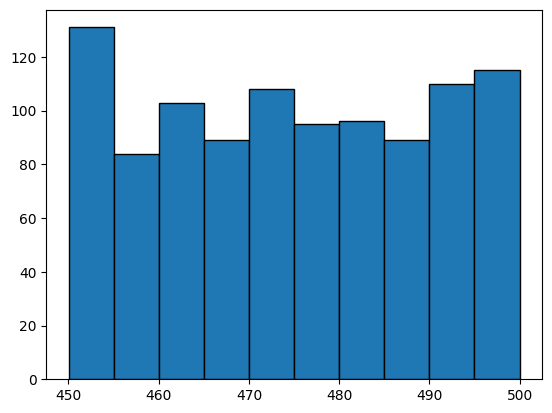

In [19]:
plt.hist(df_productos['precio'], edgecolor='black')

###Nueva consulta

In [ ]:
import sqlite3
import pandas as pd

# Conectar a la base de datos
conn = sqlite3.connect('productos.db')

# Realizar la consulta y cargar los resultados en un DataFrame
query = "SELECT * FROM inventario WHERE precio > 480 OR cantidad < 5"
df_productos = pd.read_sql_query(query, conn)

# Mostrar el DataFrame
print(df_productos)


# Cerrar la conexión
conn.close()

###Insertar nuevo producto

In [ ]:
# Datos del nuevo producto
nuevo_producto = (
    None,  # SQLite genera un nuevo id automáticamente si la columna es autoincrement
    'NuevoProducto123',
    'Electrónica',
    249.99,
    20,
    'ProveedorX',
    '2024-04-16',
    'Almacén D'
)

# Conexión con la DB
conn = sqlite3.connect('productos.db')
c = conn.cursor()

# Insersión de nuevo producto
c.execute('INSERT INTO inventario VALUES (?, ?, ?, ?, ?, ?, ?, ?)', nuevo_producto)

# Guardar (commit) los cambios y cerrar conexión con la DB
conn.commit()
conn.close()

##Insertar nuevo producto desde Excel

###Crear tabla excel de nuevos productos

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(0)
num_prods = 5000

# Productos nuevos
nombres = ['Producto' + str(i) for i in range(num_prods)]
categorias = np.random.choice(['Electrónica', 'Hogar', 'Jardín', 'Moda', 'Deportes'], num_prods)
precios = np.round(np.random.uniform(10.0, 500.0, num_prods), 2)
cantidades = np.random.randint(1, 100, num_prods)
proveedores = np.random.choice(['Proveedor1', 'Proveedor2', 'Proveedor3'], num_prods)
fechas = [datetime.today() - timedelta(days=np.random.randint(0, 365)) for _ in range(num_prods)]
ubicaciones = np.random.choice(['Almacén A', 'Almacén B', 'Almacén C'], num_prods)

# DataFrame
df = pd.DataFrame({
    'Nombre': nombres,
    'Categoría': categorias,
    'Precio': precios,
    'Cantidad': cantidades,
    'Proveedor': proveedores,
    'Fecha de Ingreso': pd.to_datetime(fechas),
    'Ubicación': ubicaciones
})

print(df.head())

# Guardar el DataFrame en un archivo Excel
df.to_excel('nuevos_productos_inventario.xlsx', index=False)

###Agregar datos de tabla excelal inventario

In [ ]:
import pandas as pd

# Leer archivo Excel
ruta_archivo = '/content/nuevos_productos_inventario.xlsx'
df = pd.read_excel(ruta_archivo)

# Verificación de formatos (tipo de dato)
# Precio a float
if df['Precio'].dtype != 'float':
    df['Precio'] = df['Precio'].astype(float)

# Fecha de Ingreso a datetime
if df['Fecha de Ingreso'].dtype != 'datetime64[ns]':
    df['Fecha de Ingreso'] = pd.to_datetime(df['Fecha de Ingreso'], errors='coerce')

# Verificar y corregir fechas no válidas, usando la fecha de hoy
df['Fecha de Ingreso'].fillna(pd.Timestamp.today(), inplace=True)

df.head()

In [ ]:
import sqlite3

# Conexión con la DB
conn = sqlite3.connect('productos.db')
c = conn.cursor()

# Insersión de datos en la DB
for index, row in df.iterrows():
    c.execute("""
        INSERT INTO inventario (id, nombre, categoria, precio, cantidad, proveedor, fecha_ingreso, ubicacion)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?)""", (row[], row['Nombre'], row['Categoría'], row['Precio'], row['Cantidad'], row['Proveedor'], row['Fecha de Ingreso'], row['Ubicación']))


# # Insersión de datos en la DB
# for index, row in df.iterrows():
#     c.executemany("""
#         INSERT INTO inventario (nombre, categoria, precio, cantidad, proveedor, fecha_ingreso, ubicacion)
#         VALUES(?, ?, ?, ?, ?, ?,)""",
#         [row['Nombre'], row['Categoría'], row['Precio'], row['Cantidad'], row['Proveedor'], row['Fecha de Ingreso'], row['Ubicación']])

# Guardar cambios y cerrar conexión con DB
conn.commit()
conn.close()

print("¡Datos importados exitosamente!")